#📚 This guide explains how to apply pruning to YOLOv5 🚀 models. 

##Before You Start

Clone repo and install requirements.txt in a Python>=3.7.0 environment, including PyTorch>=1.7. Models and datasets download automatically from the latest YOLOv5 release.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 10878, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 10878 (delta 1), reused 8 (delta 1), pack-reused 10866
Receiving objects: 100% (10878/10878), 10.98 MiB | 21.88 MiB/s, done.
Resolving deltas: 100% (7507/7507), done.
/content/yolov5
     |████████████████████████████████| 596 kB 12.4 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


#Test Normally

Before pruning we want to establish a baseline performance to compare to. This command tests YOLOv5x on COCO val2017 at image size 640 pixels. yolov5x.pt is the largest and most accurate model available. Other options are yolov5s.pt, yolov5m.pt and yolov5l.pt, or you own checkpoint from training a custom dataset ./weights/best.pt. For details on all available models please see our README table.

In [2]:
!python val.py --weights yolov5x.pt --data coco128.yaml --img 640 --half

val: data=/content/yolov5/data/coco128.yaml, weights=['yolov5x.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.0-237-gdc7e093 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

100% 166M/166M [00:10<00:00, 17.3MB/s]

Fusing layers... 
Model Summary: 444 layers, 86705005 parameters, 0 gradients

Dataset not found, missing paths: ['/content/datasets/coco128/images/train2017']
100% 6.66M/6.66M [00:01<00:00, 6.73MB/s]
Dataset autodownload success, saved to /content/datasets

val: Scanning '/content/datasets/coco128/labels/train2017' images and labels...128 found, 0 missing, 2 empty, 0 corrupt: 100% 128/128 [00:00<00:00, 1119.99it/s]
val: New cache created: /content/datasets/coco128/labels/train2017.cache
               Class     Images     Labels         

#Test YOLOv5x on COCO (0.30 sparsity)

##YOLOV5 Pruning Procedure?
You will first need to train yolov5 on your custom data, once training will completed, then you need to validate your trained model on val data, at that time you can call prune function for trained model to pruned.

If you are using custom model, then open yolov5 folder, where you already performed training, open val.py file and paste mentioned code, at location shown in Image. Otherwise, you can clone yolov5 repository from github, and install it dependencies. open val.py file and paste mentioned code, at location shown in Image.



```
from utils.torch_utils import prune
prune(model,0.3)
```



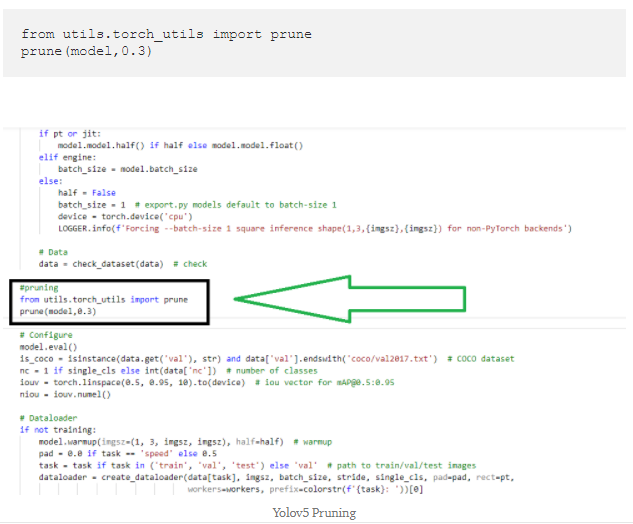


Once you have added above code, then save file. Then open the terminal in same folder, and run below command. This command will prune your model.

In [6]:
!python val.py --weights yolov5x.pt --data coco128.yaml --img 640 --half

val: data=/content/yolov5/data/coco128.yaml, weights=['yolov5x.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.0-237-gdc7e093 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 444 layers, 86705005 parameters, 0 gradients
Pruning model...  0.3 global sparsity
val: Scanning '/content/datasets/coco128/labels/train2017.cache' images and labels... 128 found, 0 missing, 2 empty, 0 corrupt: 100% 128/128 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 4/4 [00:17<00:00,  4.37s/it]
                 all        128        929      0.773      0.736      0.813      0.597
Speed: 0.3ms pre-process, 109.1ms inference, 4.8ms NMS per image at shape (32, 3, 640, 640)
Results s

You can set percentage of pruning with calling of pruning function, like in above Image, I have pruned my model with 30% sparsity. which means that 30% of the model’s weight parameters in nn.conv2d layers will equal to 0, While AP (Average precision) and AR (Average Recall) scores will be slightly reduced. You can change according to your use-case.